CODE IMPLEMENTATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2. Chargement des données

In [2]:
# Lire le fichier CSV
df = pd.read_csv('../data/kidney_disease.csv')

# Afficher les 5 premières lignes
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


3. Exploration initiale

In [3]:
# Informations de base sur le dataframe
print("Shape:", df.shape)
print("\nInfo:")
df.info()

# Statistiques descriptives
df.describe(include='all')

Shape: (400, 26)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc         

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,...,330,295,270,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,...,44,92,49,2,5,3,2,2,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,...,41,9800,5.2,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,201,259,354,374,...,21,11,18,251,258,362,317,323,339,248
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4. Nettoyage des données (à adapter selon le dataset)

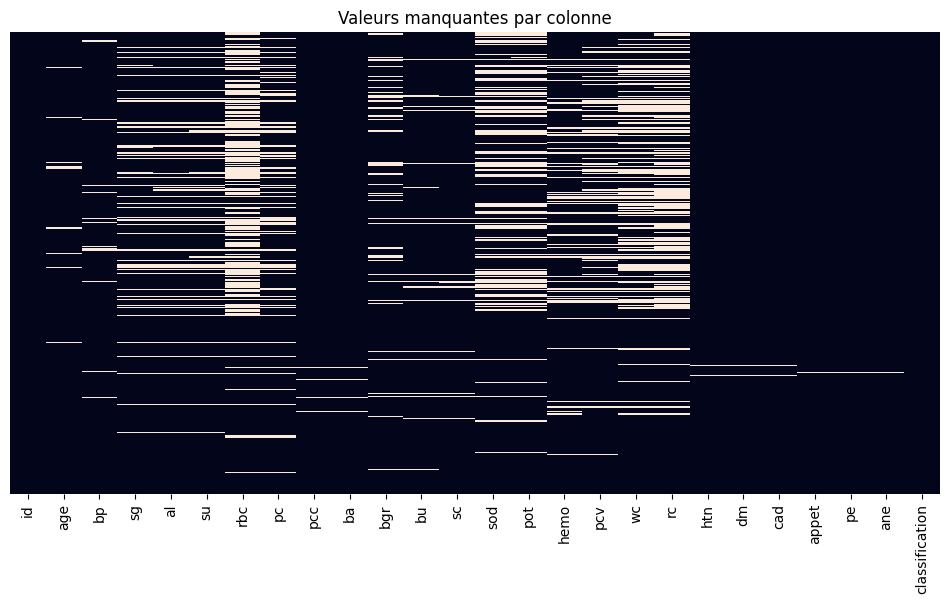

In [4]:
# Vérification des valeurs manquantes
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.title('Valeurs manquantes par colonne')
plt.show()

# Gestion des valeurs manquantes (exemple)
df.fillna(df.mode().iloc[0], inplace=True)  # Remplissage par le mode

# Conversion des variables catégorielles
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['classification'] = le.fit_transform(df['classification'])

5. Analyse univariée

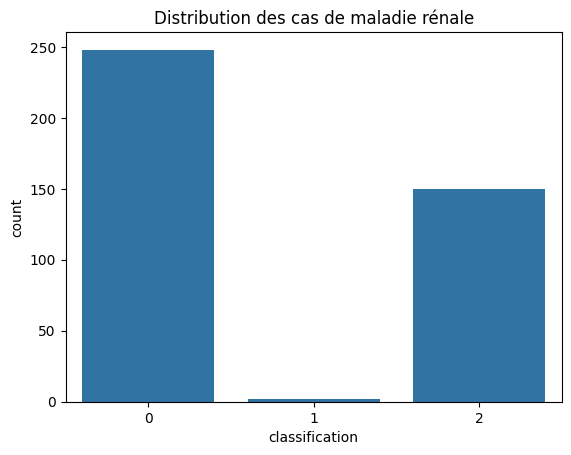

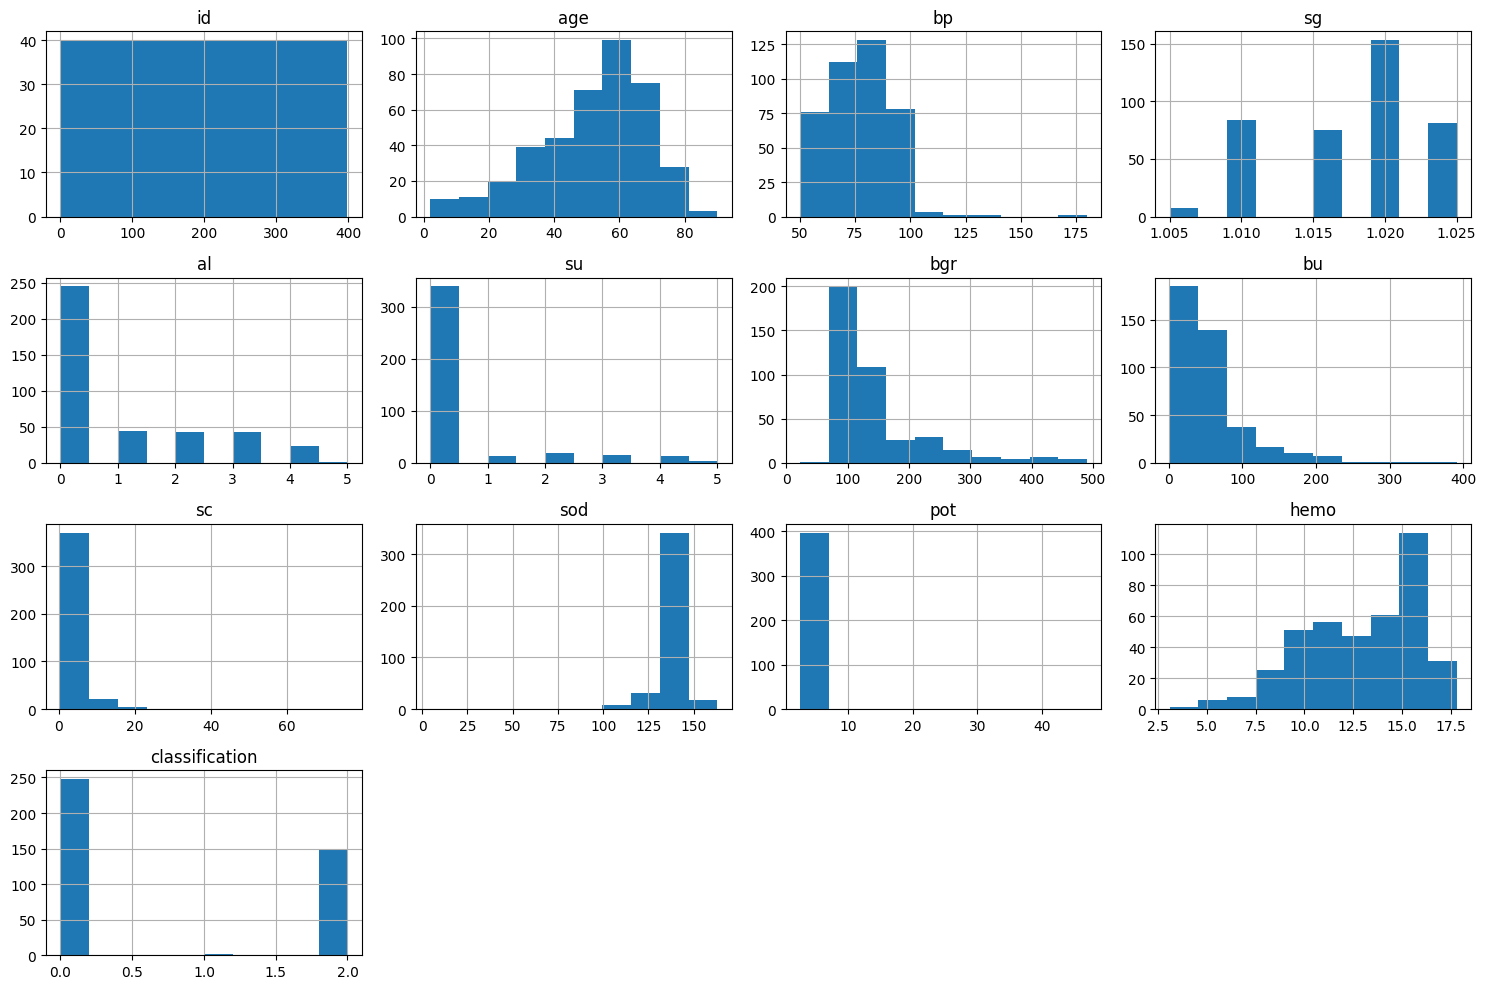

In [5]:
# Distribution de la variable cible
sns.countplot(x='classification', data=df)
plt.title('Distribution des cas de maladie rénale')
plt.show()

# Histogrammes pour les variables numériques
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

Nettoyage des données (ETL)
Identification des colonnes ayant des valeurs manquantes.
Traitement des valeurs manquantes : Suppression ou remplacement selon le type de données.
Conversion des types de données si nécessaire (par exemple : pcv, wc, rc doivent probablement être des float).
Standardisation ou normalisation (si nécessaire).

In [6]:
# Identification des colonnes avec des valeurs manquantes
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0].sort_values(ascending=False)

# Afficher les colonnes qui ont des valeurs manquantes
print("Colonnes avec des valeurs manquantes :")
print(missing_columns)


Colonnes avec des valeurs manquantes :
Series([], dtype: int64)


In [7]:
# Imputation des colonnes numériques par la moyenne
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())

# Imputation des colonnes catégorielles par le mode
cat_columns = df.select_dtypes(include=['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.fillna(x.mode()[0]))


In [8]:
# Conversion des colonnes 'pcv', 'wc', 'rc' en numérique
for col in ['pcv', 'wc', 'rc']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remplacement des valeurs manquantes générées par cette conversion par la moyenne
df[['pcv', 'wc', 'rc']] = df[['pcv', 'wc', 'rc']].fillna(df[['pcv', 'wc', 'rc']].mean())

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Liste des colonnes numériques à normaliser
num_cols_to_scale = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

# Appliquer la standardisation
df[num_cols_to_scale] = scaler.fit_transform(df[num_cols_to_scale])

print("Standardisation terminée avec succès.")

Standardisation terminée avec succès.


Détection et traitement des doublons

La détection et la suppression (ou la consolidation) des doublons sont des étapes essentielles du processus 
de nettoyage des données. Un doublon correspond à un enregistrement qui se répète, partiellement ou 
totalement, dans l'ensemble de données. La présence de doublons peut fausser les analyses statistiques 
et biaiser les modèles prédictifs.

In [17]:
# Détection et traitement des doublons
duplicates = df[df.duplicated()]
print("Nombre de doublons détectés :", len(duplicates))

# Si nécessaire, vous pouvez afficher les doublons pour inspection :
display(duplicates)

# Suppression des doublons (en gardant la première occurrence)
# df.drop_duplicates(inplace=True)
# print("Nombre d'observations après suppression des doublons :", df.shape[0])


Nombre de doublons détectés : 0


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


Analyse Exploratoire des Données (EDA)

L'objectif de l'analyse exploratoire est de comprendre la distribution des données, détecter les anomalies, découvrir les relations entre les variables, et obtenir des informations qui peuvent aider dans la phase de modélisation.

In [23]:
# Affichage des premières lignes
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,-0.216167,0.254214,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,0.579963,-0.375135,0.381544,yes,yes,no,good,no,no,0
1,1,-2.627830,-1.972476,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,-0.153493,-1.069163,0.381544,no,no,no,good,no,no,0
2,2,0.607327,0.254214,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,-1.009191,-0.490806,0.381544,no,yes,no,poor,no,yes,0
3,3,-0.216167,-0.488016,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,-0.886948,-0.799263,-1.112094,yes,no,no,poor,yes,yes,0
4,4,-0.039704,0.254214,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,-0.520220,-0.567921,-0.307827,no,no,no,good,no,no,0


In [24]:
# Informations générales sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

In [25]:
# Statistiques descriptives des colonnes numériques
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification
count,400.000000,4.000000e+02,400.000000,400.000000,400.00000,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000
mean,199.500000,1.776357e-17,0.000000,1.017712,0.90000,0.395000,1.776357e-17,1.776357e-17,-1.776357e-17,-1.776357e-17,4.440892e-18,-3.552714e-17,-3.552714e-17,-1.776357e-17,3.552714e-17,0.755000
std,115.614301,1.001252e+00,1.001252,0.005434,1.31313,1.040038,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,0.968152
min,0.000000,-2.921936e+00,-1.972476,1.005000,0.00000,0.000000,-1.582223e+00,-1.123748e+00,-4.611060e-01,-1.431929e+01,-6.582990e-01,-3.435474e+00,-3.698529e+00,-2.534335e+00,-3.180208e+00,0.000000
25%,99.750000,-5.690936e-01,-0.488016,1.015000,0.00000,0.000000,-5.723701e-01,-6.063404e-01,-3.721881e-01,-2.138781e-01,-3.080002e-01,-6.953416e-01,-6.424631e-01,-6.932313e-01,-4.227223e-01,0.000000
50%,199.500000,1.955800e-01,0.254214,1.020000,0.00000,0.000000,-3.690881e-01,-2.614022e-01,-3.188374e-01,-1.057906e-01,-1.153359e-01,2.297834e-01,2.132352e-01,2.417794e-01,3.815443e-01,0.000000
75%,299.250000,7.249694e-01,0.254214,1.020000,2.00000,0.000000,9.649340e-02,9.875376e-02,-4.763777e-02,4.346467e-01,1.473882e-01,7.584264e-01,5.799631e-01,3.960079e-01,3.815443e-01,2.000000
max,399.000000,2.254317e+00,7.676514,1.025000,5.00000,5.000000,4.555584e+00,6.779394e+00,1.298328e+01,2.812571e+00,1.493000e+01,1.745226e+00,1.802389e+00,6.796493e+00,3.598610e+00,2.000000


In [31]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Caractères non imprimables trouvés :
 - Ligne 65, Colonne 'dm': caractère ''\t'' (code ASCII = 9)
 - Ligne 88, Colonne 'dm': caractère ''\t'' (code ASCII = 9)
 - Ligne 138, Colonne 'dm': caractère ''\t'' (code ASCII = 9)
 - Ligne 188, Colonne 'dm': caractère ''\t'' (code ASCII = 9)
 - Ligne 194, Colonne 'dm': caractère ''\t'' (code ASCII = 9)
 - Ligne 40, Colonne 'cad': caractère ''\t'' (code ASCII = 9)
 - Ligne 64, Colonne 'cad': caractère ''\t'' (code ASCII = 9)


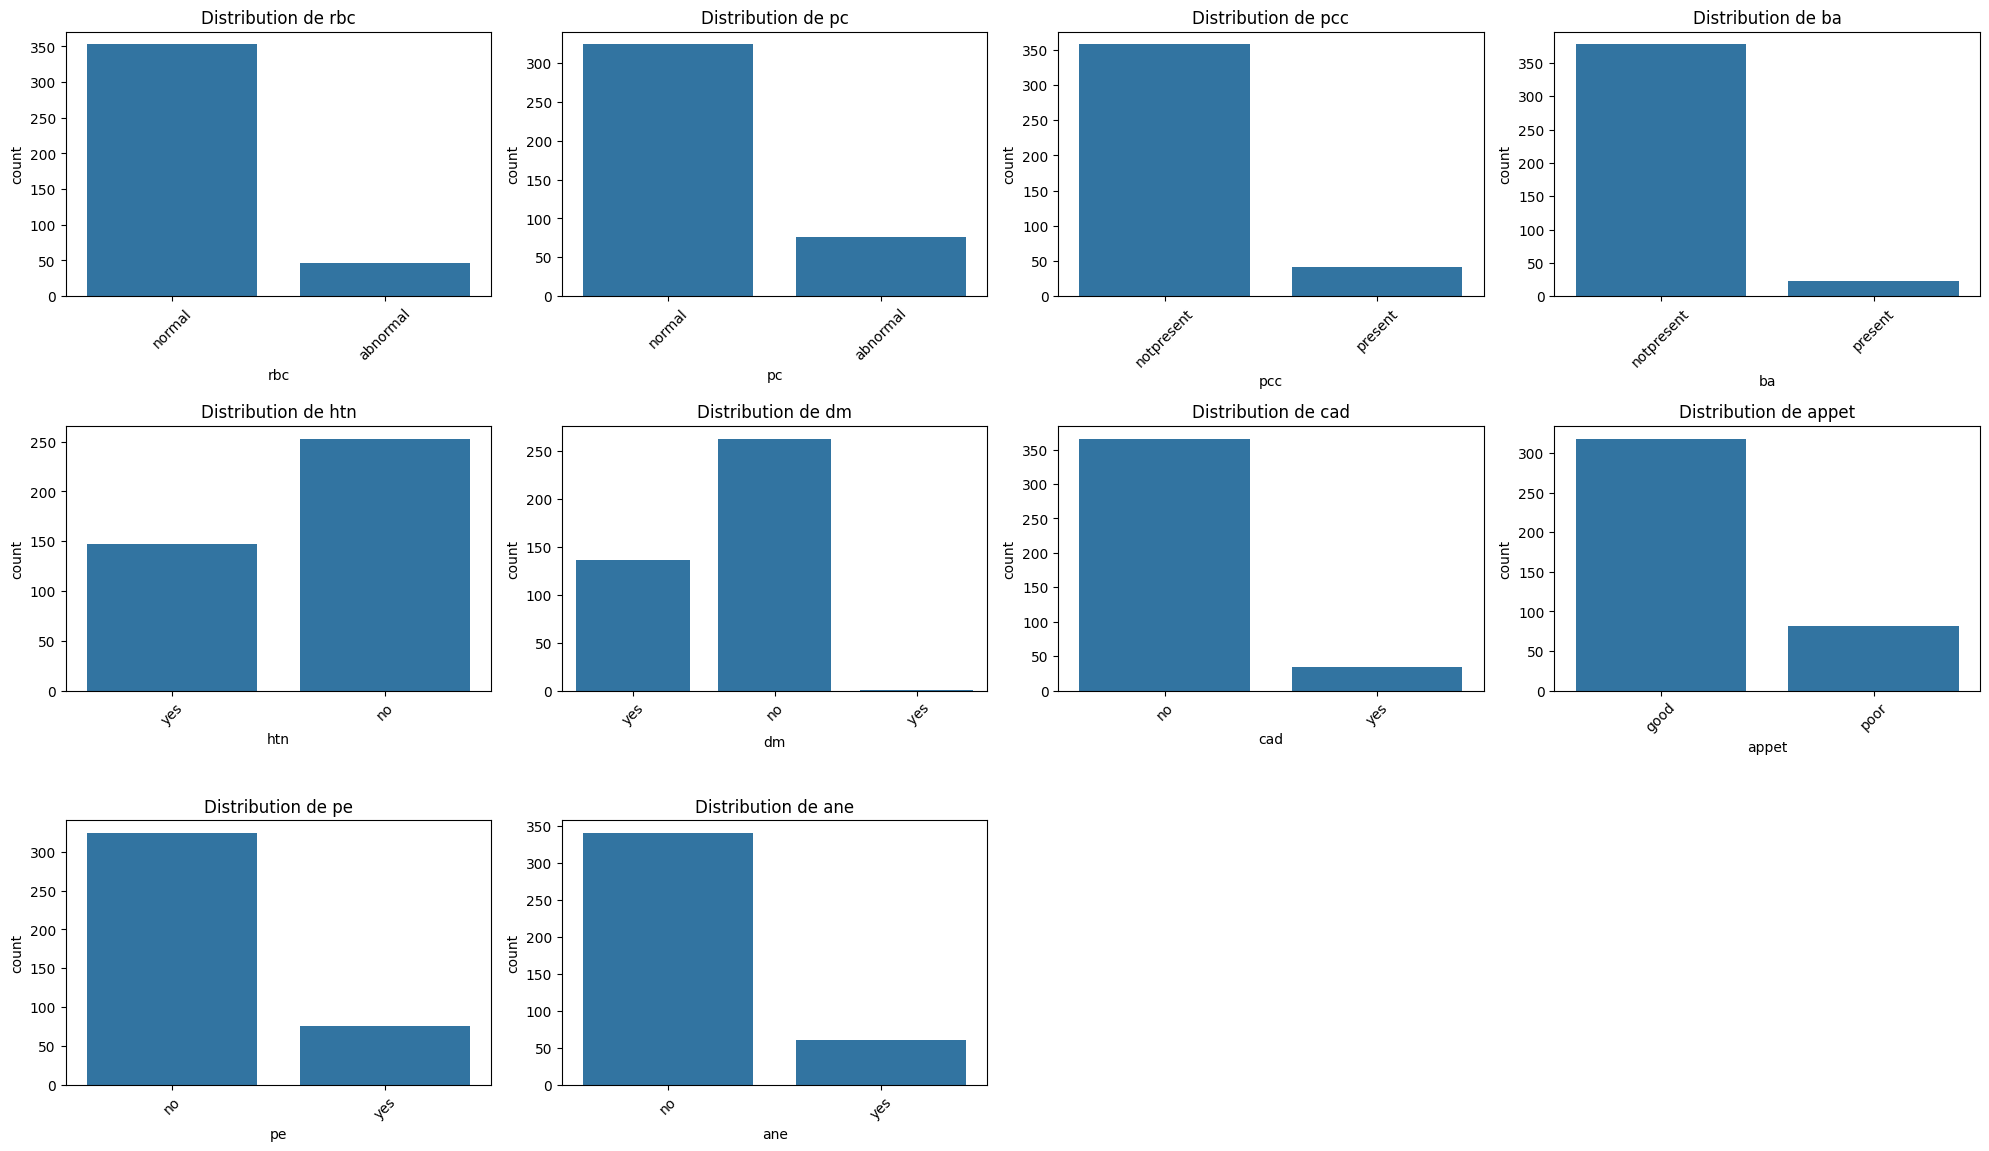

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Recharger la configuration par défaut
mpl.rcParams.update(mpl.rcParamsDefault)

# Spécifier la police DejaVu Sans (qui est intégrée par défaut avec matplotlib)
mpl.rcParams['font.family'] = 'DejaVu Sans'

def find_non_printable_characters(df: pd.DataFrame):
    """Parcourt tous les objets (str) du DataFrame et repère toute occurrence de caractère non imprimable."""
    non_printable_positions = []
    # Parcourir seulement les colonnes de type object
    for col in df.select_dtypes(include='object').columns:
        for idx, val in df[col].items():
            if pd.notnull(val):
                for ch in val:
                    # ch.isprintable() = False Indique qu'il s'agit d'un caractère non imprimable (caractère de contrôle, etc.)
                    if not ch.isprintable():
                        non_printable_positions.append((idx, col, ch, ord(ch)))
    
    return non_printable_positions

non_printable = find_non_printable_characters(df)
if len(non_printable) == 0:
    print("Aucun caractère non imprimable trouvé dans les colonnes de type object.")
else:
    print("Caractères non imprimables trouvés :")
    for pos in non_printable:
        row_idx, col_name, ch, code = pos
        print(f" - Ligne {row_idx}, Colonne '{col_name}': caractère '{repr(ch)}' (code ASCII = {code})")

def remove_tabs_in_df(df):
    df_clean = df.copy()
    for col in df_clean.select_dtypes(include=['object']).columns:
        df_clean[col] = df_clean[col].str.replace('\t', '', regex=False)
    return df_clean

df = remove_tabs_in_df(df)

# Variables catégorielles
cat_columns = df.select_dtypes(include=['object']).columns

# Affichage des graphiques
plt.figure(figsize=(20, 15))
for i, column in enumerate(cat_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution de {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

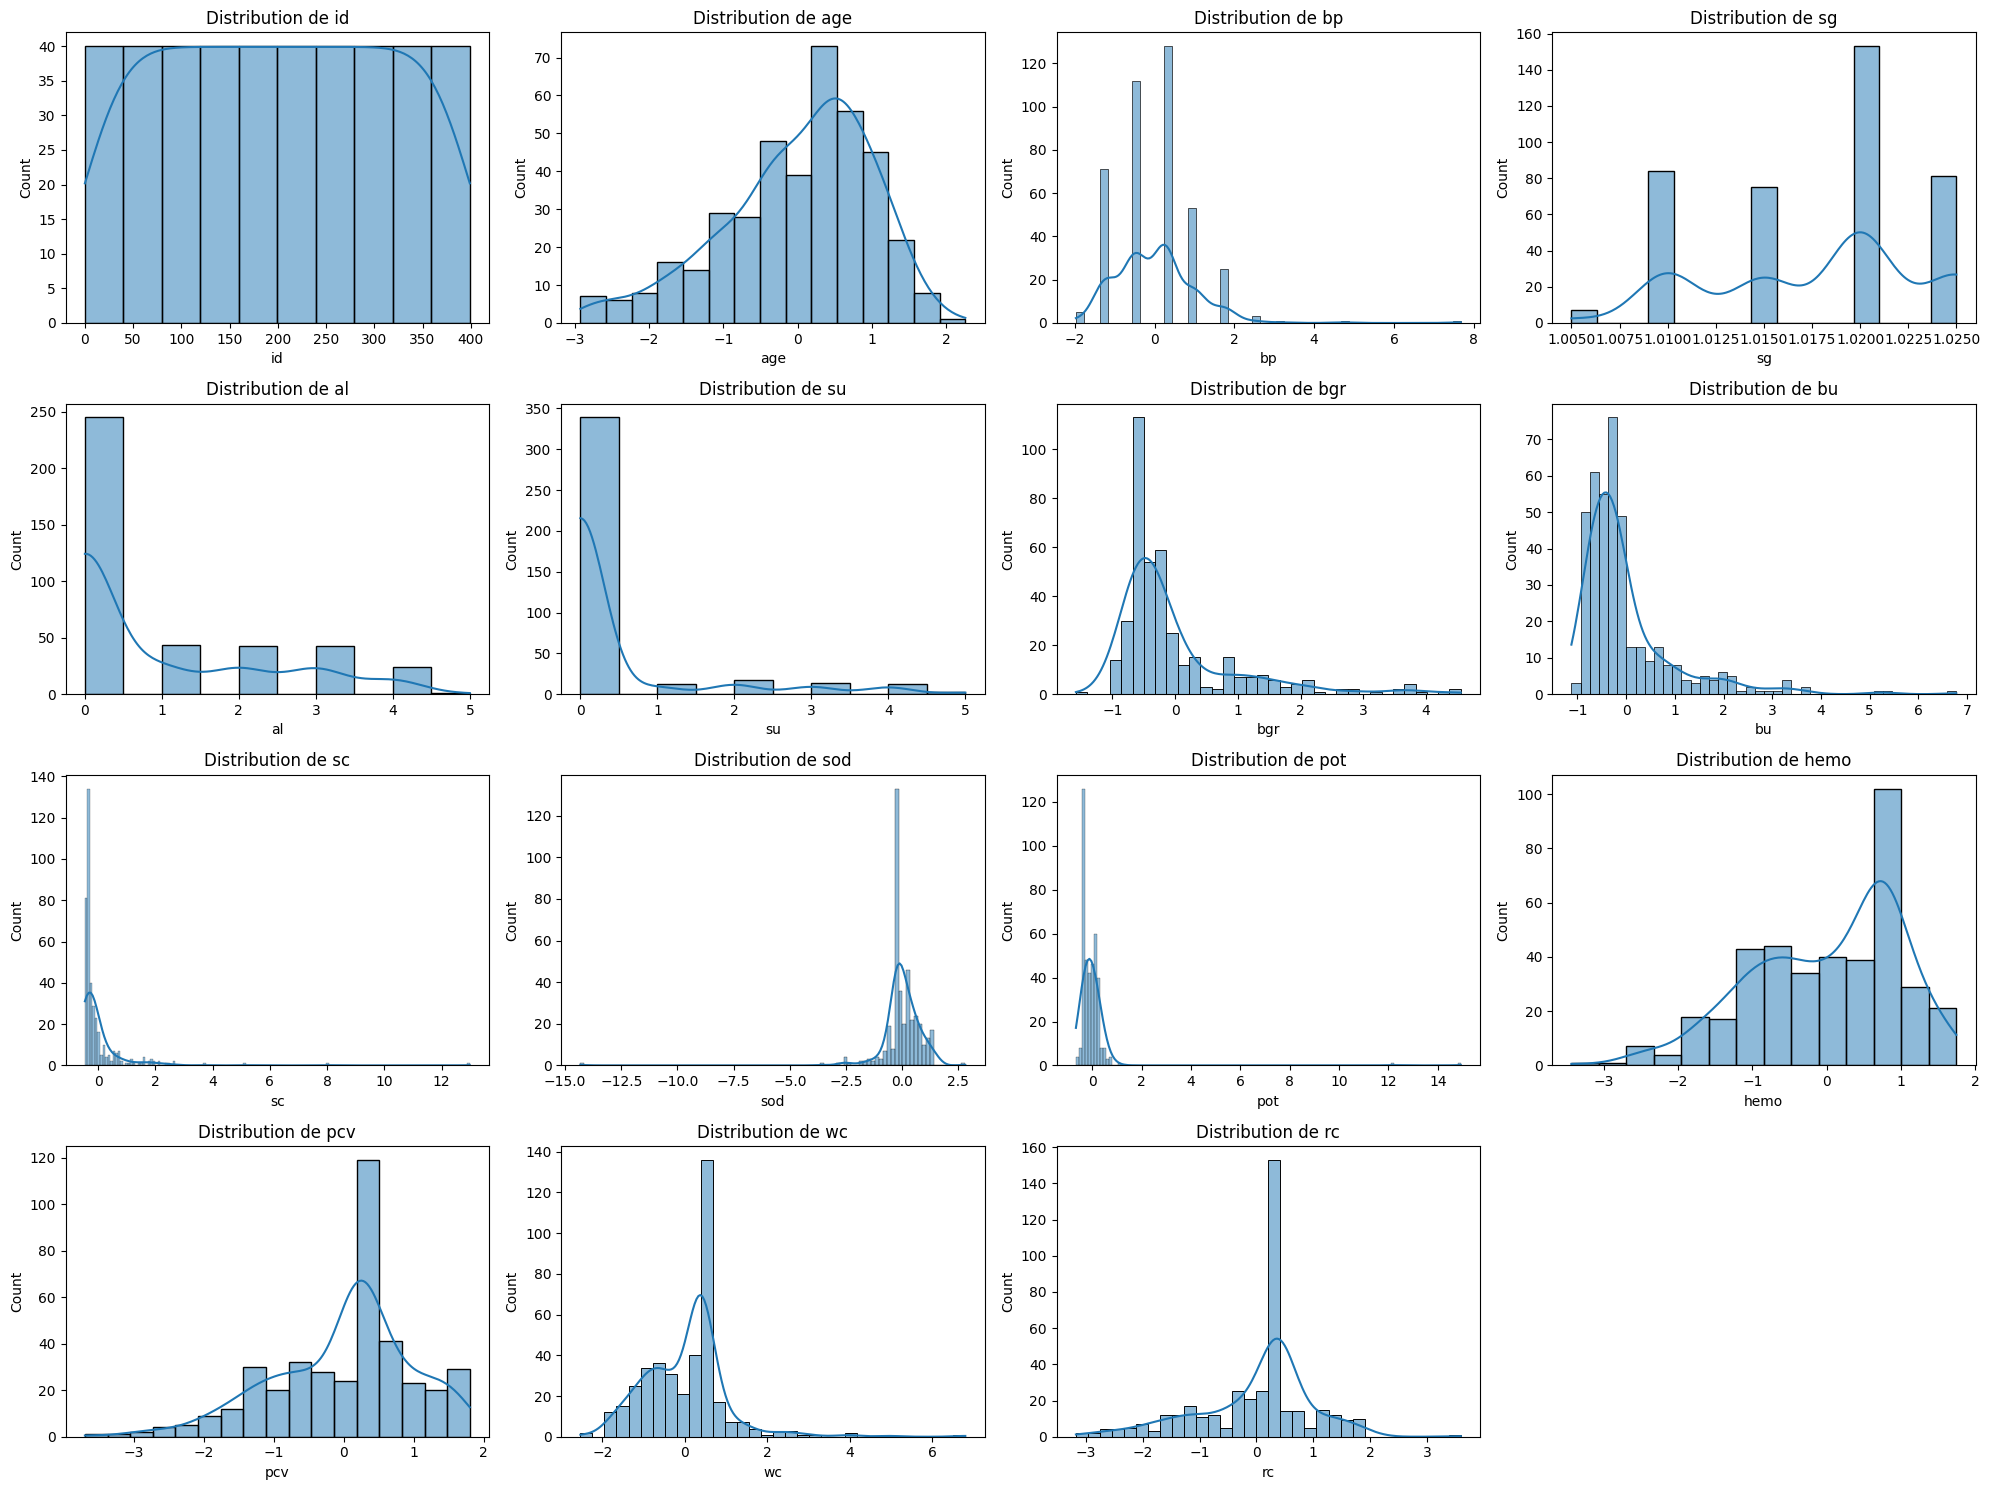

In [33]:
#Distribution des variables numériques
# Variables numériques
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Affichage des graphiques
plt.figure(figsize=(20, 15))
for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution de {column}')
plt.tight_layout()
plt.show()

In [34]:
# Analyse de la corrélation entre les variables numériques
# Identifier les colonnes qui sont encore de type 'object'
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Colonnes non numériques :")
print(non_numeric_columns)


Colonnes non numériques :
Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], dtype='object')


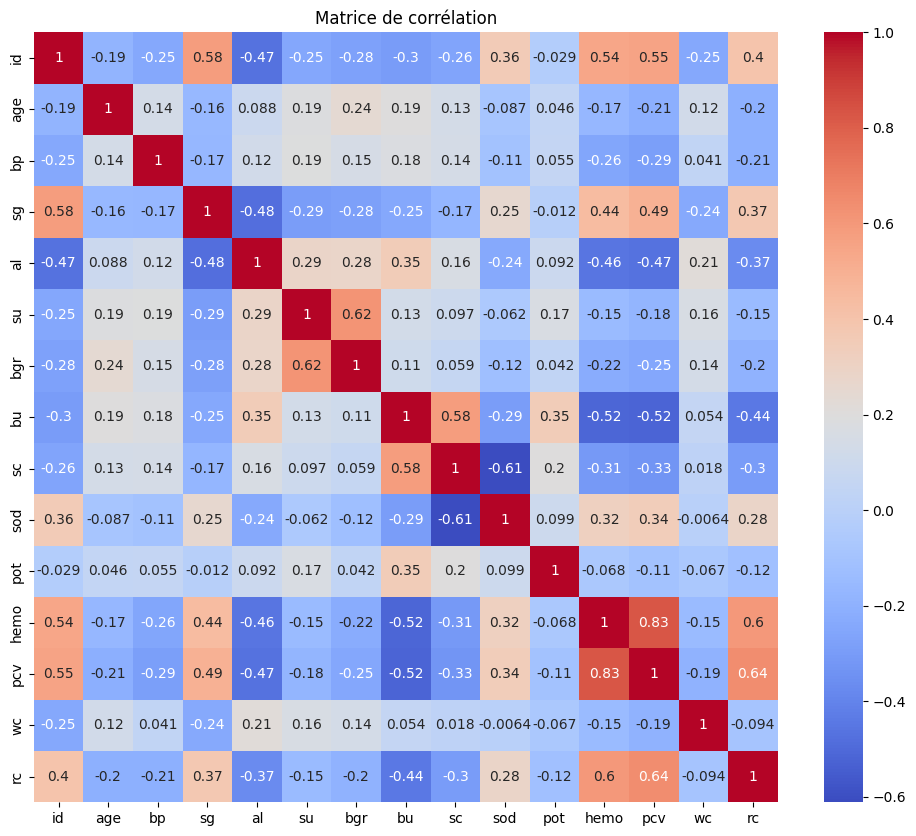

In [35]:
# Garder seulement les colonnes numériques pour calculer la corrélation
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation uniquement sur les données numériques
correlation_matrix = df_numeric.corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

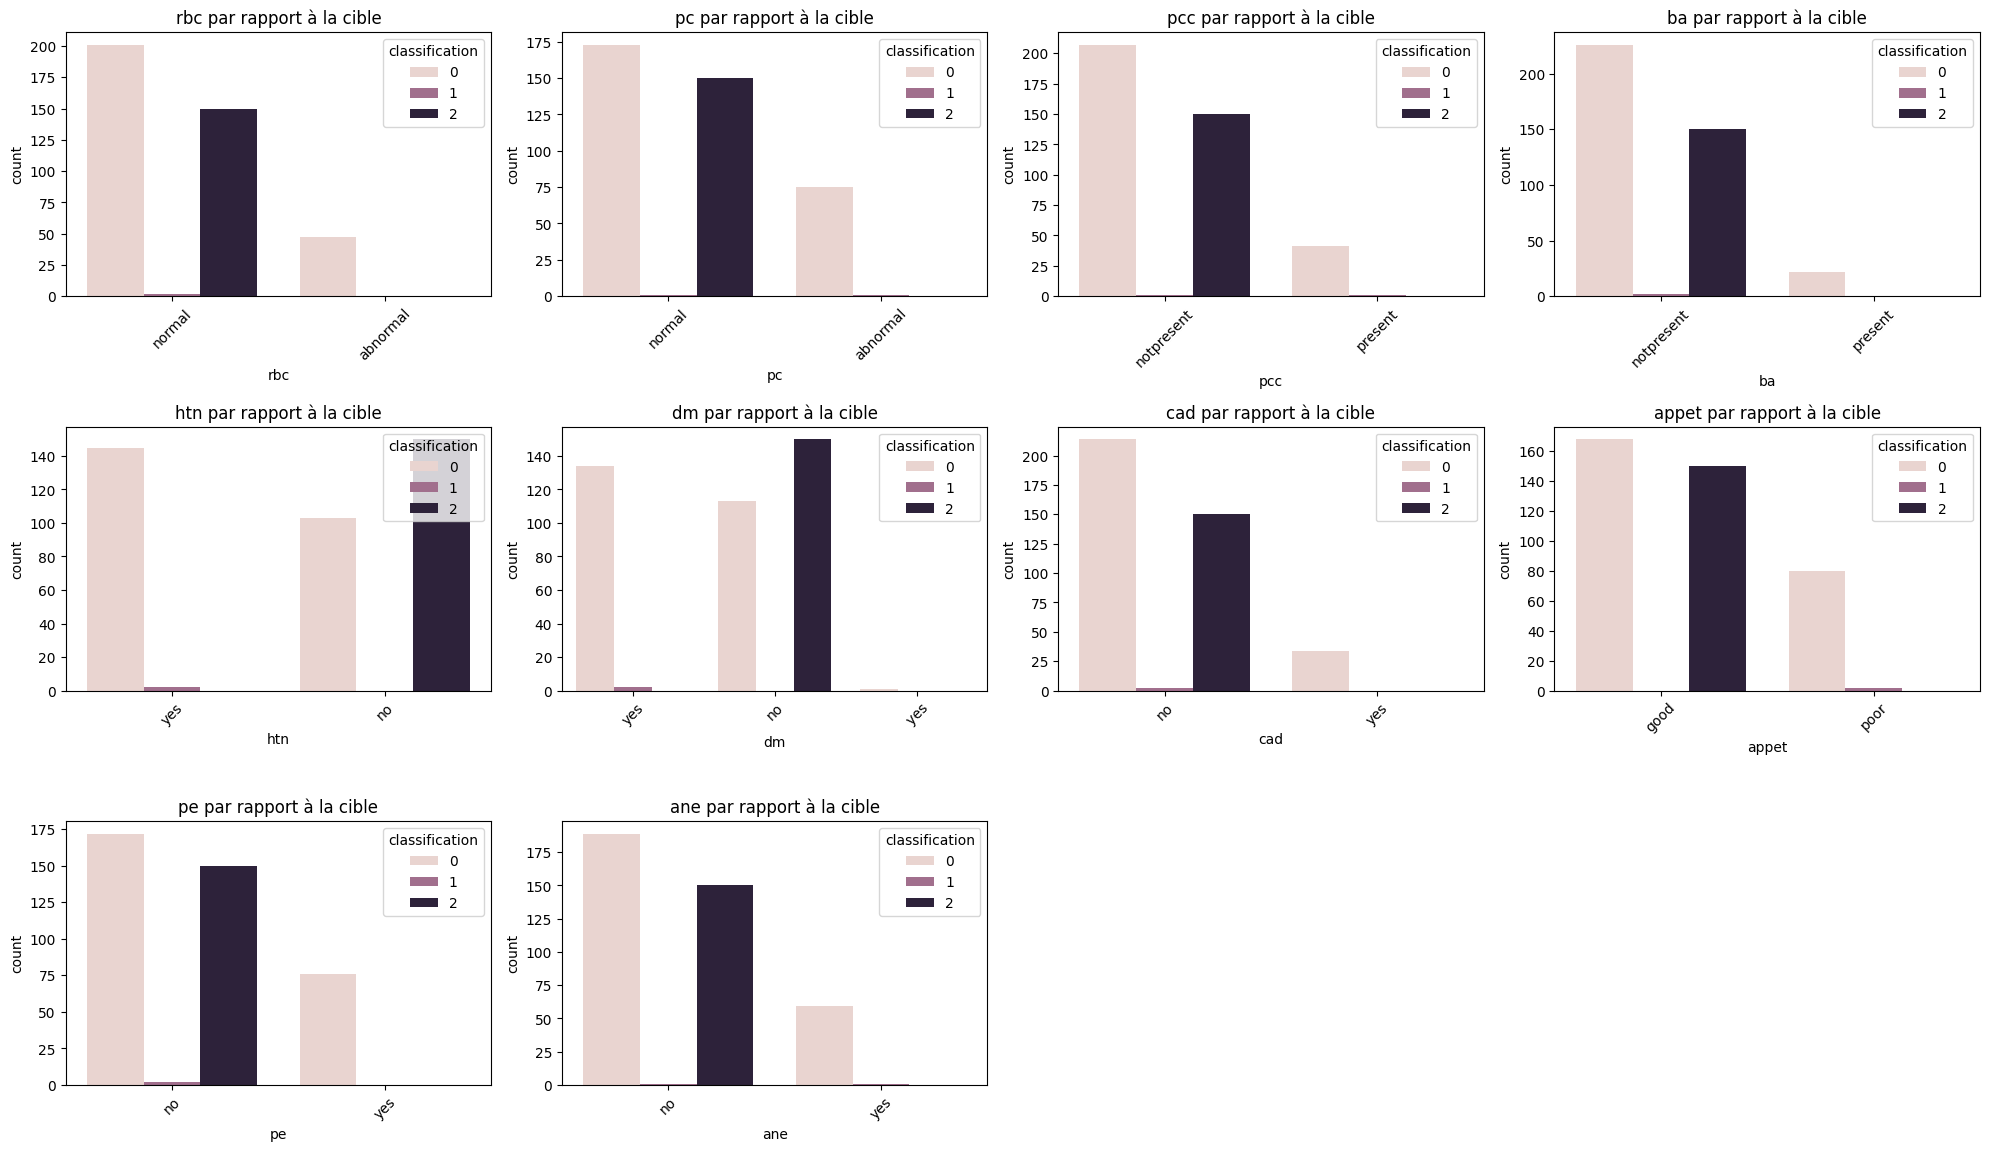

In [28]:
#Analyse des relations entre les variables catégorielles et la cible
# Liste des colonnes catégorielles sans la colonne cible
cat_columns = [col for col in cat_columns if col != 'classification']

plt.figure(figsize=(20, 15))
for i, column in enumerate(cat_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=column, hue='classification')
    plt.title(f'{column} par rapport à la cible')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()